## Circle valued parametrization
This notebook walks us thru the following process:
* Generate a data set of samples of the data
    - this is the delayed embedding
        * we take a subset of the time series, which becomes a row
* Compute persistent pairing of rips filtration
    - using persistent cohomology
* Assign each vertex in the delayed embedding a circle valued function
    - we use PCA to reduce the dimension to the 2 principal axes
* Plot the values assigned to the vertex

### Summary of graphics
Each period is reduced to a circle and
display the circular coordinates directly on the data
set, plotting each point in color according to its coordinate
value interpreted on the standard hue-circle. This works less
well in grayscale reproductions, of course

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import call
import webbrowser
import os
import heapq
%matplotlib inline

from timeDelayEmbedding import embed
from circular_valued_parameterization import circleValuedParametrization

Create object to display pdfs, thanks to: (http://stackoverflow.com/questions/19470099/view-pdf-image-in-an-ipython-notebook)

In [2]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

### Sine with no noise

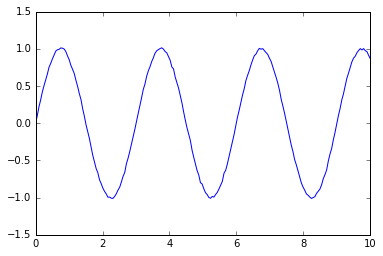

In [29]:
from generateData import sineData
wavelength=3
V = sineData(0, 10, 200, wavelength, std_dev=0.01)
plt.plot(V[:,0],V[:,1])

In [47]:
taumax = 140
elen = 60
dt = 40 
X = embed(V[:,1], taumax, elen, dt)

X.astype('float64', order='C')
np.savetxt('data.txt', X, fmt='%0.19f')

circleValuedParametrization('./data.txt', 2, display=False)
PDF('points-0.pdf',size=(600,400))

Removed files
Built Rips
Assigned vertex
Generated graphic


### Sine with noise
Let's look at a sine wave with noise

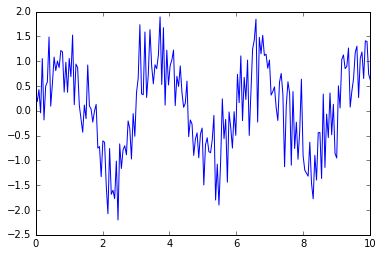

In [131]:
wavelength=3
V = sineData(0, 10, 200, wavelength, std_dev=0.5)
plt.plot(V[:,0],V[:,1])

In [136]:
taumax = 140
elen = 60
dt = 45 

X = embed(V[:,1], taumax, elen, dt)

X.astype('float64', order='C')
np.savetxt('data.txt', X, fmt='%0.19f')

circleValuedParametrization('./data.txt', 8, display=False)
PDF('points-0.pdf',size=(600,400))

Removed files
Built Rips
Assigned vertex
Generated graphic


### Incommensarble periods
Let's look at a case when waves are on top of one another

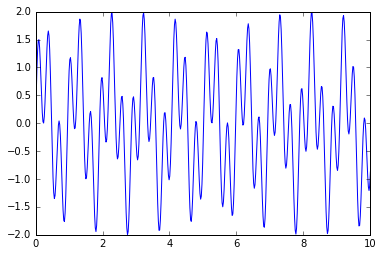

In [83]:
from generateData import incomSineData
V=incomSineData(0,10,500,1)
plt.plot(V[:,0],V[:,1])

In [127]:
taumax = 263
elen = 47
dt = 40 

X = embed(V[:,1], taumax, elen, dt)

X.astype('float64', order='C')
np.savetxt('data.txt', X, fmt='%0.19f')

circleValuedParametrization('./data.txt', 7, display=False)
PDF('points-0.pdf',size=(600,400))

Removed files
Built Rips
Assigned vertex
Generated graphic


## Real World Data

### audio

In [137]:
import scipy.io.wavfile
from sklearn import preprocessing

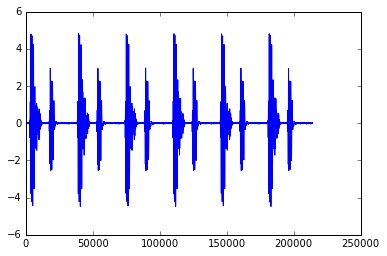

In [172]:
Fs, X = scipy.io.wavfile.read("./audio/Heartbeat.wav")

X = preprocessing.scale(X[:len(X)/2].reshape(-1,1))
plt.plot(X)

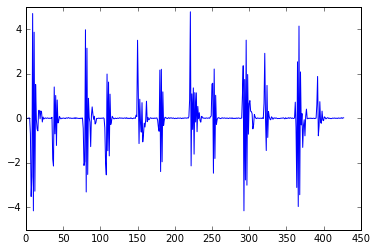

In [173]:
V = X[::500]
plt.plot(np.arange(len(V)), V)

In [174]:
dt = 15 #np.argmin(V[:int(len(V)*0.05)])
taumax = 355 #int(dt + len(V)*0.01)
elen = 73
D = embed(V[:,0], taumax, elen, dt) 

# save file for dionysus
D.astype('float64', order='C')
np.savetxt('data.txt', D, fmt='%0.19f')

circleValuedParametrization('./data.txt', 20, display=False)
PDF('points-0.pdf',size=(600,400))

Removed files
Built Rips
Assigned vertex
Generated graphic


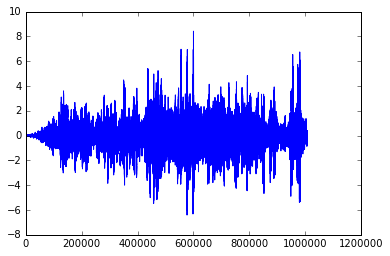

In [175]:
Fs, X = scipy.io.wavfile.read("./audio/Beach Waves.wav")

X = preprocessing.scale(X[:len(X)/2].reshape(-1,1))
plt.plot(X)

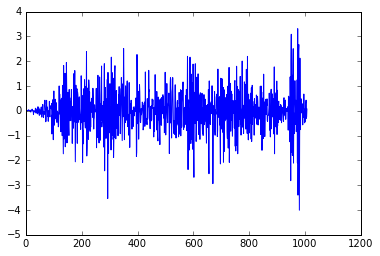

In [177]:
V = X[::1000]
plt.plot(np.arange(len(V)), V)

In [181]:
dt = 60
taumax = 984
elen = 24
ep = 36
D = embed(V[:,0], taumax, elen, dt)
D.astype('float64', order='C')
np.savetxt('data.txt', D, fmt='%0.10f')
circleValuedParametrization('./data.txt', ep, display=False)
PDF('points-0.pdf',size=(600,400))

Removed files
Built Rips
Assigned vertex
Generated graphic
